In [12]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import cross_validation, datasets, metrics, tree 

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

In [6]:
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [8]:
X=digits.data

In [9]:
y=digits.target

In [10]:
X,y

(array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.],
        [  0.,   0.,   0., ...,  16.,   9.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   2., ...,  12.,   0.,   0.],
        [  0.,   0.,  10., ...,  12.,   1.,   0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
clf = tree.DecisionTreeClassifier()

In [156]:
cross_val_score(clf, X, y,cv=10).mean()

0.82924559004042087

In [159]:
with open("1.txt", "w") as fout:
    fout.write(str(cross_val_score(clf, X, y,cv=10).mean()))

# Task 2

In [19]:
from sklearn.ensemble import BaggingClassifier

In [20]:
bagginclf=BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=100)

In [21]:
bagginclf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [158]:
with open("2.txt", "w") as fout:
    fout.write(str(cross_val_score(bagginclf, X, y,cv=10).mean()))

# Task 3

In [46]:
bagginclf2=BaggingClassifier(tree.DecisionTreeClassifier(),n_estimators=100,max_features=(X.shape[1]**0.5/X.shape[1]))
with open("3.txt", "w") as fout:
    fout.write(
        str(
            cross_val_score(bagginclf2, X, y).mean()
        )
    )
    

# Task 4

In [47]:
bagginclf3=BaggingClassifier(tree.DecisionTreeClassifier(max_features=(X.shape[1]**0.5/X.shape[1])),n_estimators=100)
with open("4.txt", "w") as fout:
    fout.write(
        str(
            cross_val_score(bagginclf3, X, y).mean()
        )
    )

In [54]:
cross_val_score(bagginclf3, X, y).mean()

0.94268673365630917

# Test 5

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, cross_validation, learning_curve, metrics 

C:\Program Files\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [55]:
rndmForest=RandomForestClassifier(max_features=(X.shape[1]**0.5/X.shape[1]),n_estimators=100)

In [57]:
cross_val_score(rndmForest, X, y).mean()

0.9437718563271974

In [60]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rndmForest, X, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

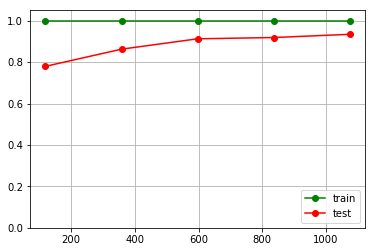

In [61]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

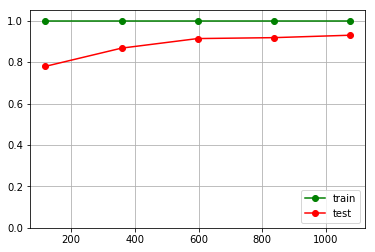

In [62]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(bagginclf3, X, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [ ]:
(X.shape[1]**0.5/X.shape[1])

In [180]:
rndmForest_min_est=RandomForestClassifier(
                                            #max_features=10,
                                          #n_estimators=50,
                                          #max_depth=5
)

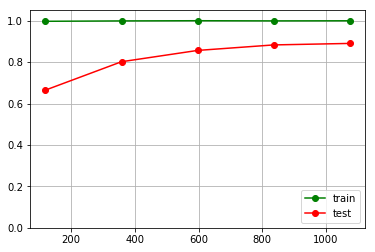

In [181]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rndmForest_min_est, X, y, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')